In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../datasets/Invoices_Std.csv", encoding='latin-1', low_memory=False)

     Month  Average_Transaction_Value
0  2010-12                  15.588431
1  2011-01                  13.191649
2  2011-02                  18.395225
3  2011-03                  17.748437
4  2011-04                  15.380842


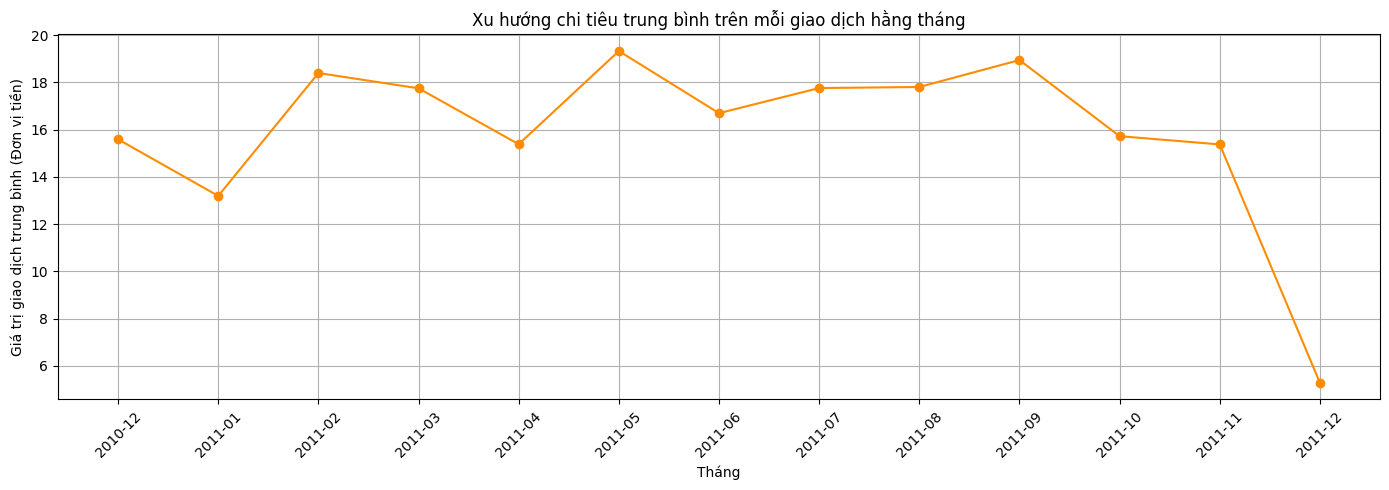

In [3]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M').astype(str)

df['Monetary'] = df['Quantity'] * df['UnitPrice']

monthly_monetary = df.groupby('Month')['Monetary'].sum().reset_index()
monthly_atv = df.groupby('Month')['Monetary'].mean().reset_index()
monthly_atv.columns = ['Month', 'Average_Transaction_Value']

print(monthly_atv.head())

plt.figure(figsize=(14, 5))
plt.plot(monthly_atv['Month'], monthly_atv['Average_Transaction_Value'], marker='o', color='darkorange')
plt.title("Xu hướng chi tiêu trung bình trên mỗi giao dịch hằng tháng")
plt.xlabel("Tháng")
plt.ylabel("Giá trị giao dịch trung bình (Đơn vị tiền)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Tổng doanh thu đạt đỉnh ở tháng 10-11/2011 ở phân tích "Doanh thu theo danh mục sản phẩm theo tháng". Tuy nhiên giá trị giao dịch trung bình đạt đỉnh ở tháng 5 và tháng 9/2011. Nghĩa là doanh thu cuối năm tăng là do số lượng giao dịch và số lượng khách mua chứ không phải do khách chi tiêu nhiều hơn mỗi lần mua.